# The sparks foundation
# Data science and Business Analytics Intern
# Name - Vikas
# Exploratory Data Analysis - Terrorism

In [1]:
# Import all required libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
data = pd.read_csv("/home/vikasmanjeda/Downloads/globalterrorism.csv", encoding='ISO-8859-1')
data.head()

/usr/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [36]:
data.columns

Index(['eventid', 'Year', 'Month', 'Day', 'approxdate', 'Extended',
       'resolution', 'country', 'Country', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [34]:
# renaming columns for better understanding 
data.rename(columns={'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'},inplace=True)
data.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [38]:
# Deleting the unnecessary columns
data= data[['Year','Month','Extended','Day','Country','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
data.head()

,Year,Month,Extended,Day,Country,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [39]:
data.size

3452129

In [40]:
data.shape

(181691, 19)

In [42]:
data.describe()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded
count,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000
mean,2002.638997,6.467277,0.045346,15.505644,23.498343,-4.586957e+02,2.403272,3.167668
std,13.259430,3.388303,0.208063,8.814045,18.569242,2.047790e+05,11.545741,35.949392
min,1970.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000
25%,1991.000000,4.000000,0.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000
50%,2009.000000,6.000000,0.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000
75%,2014.000000,9.000000,0.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000
max,2017.000000,12.000000,1.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000


In [47]:
# Check the Null values in data 
data.isnull().sum()

Year                0
Month               0
Extended            0
Day                 0
Country             0
State             421
Region              0
City              434
Latitude         4556
Longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

# Correlation Analysis

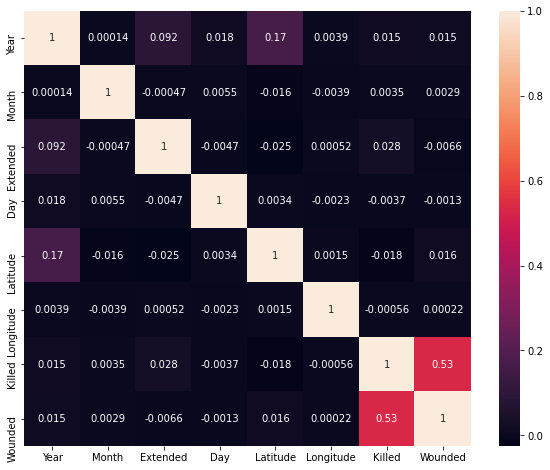

In [61]:
plt.figure(figsize= (10,8))
sns.heatmap(data.corr() ,annot= True)
plt.show()

# Terroist activities region in each year through area plot 

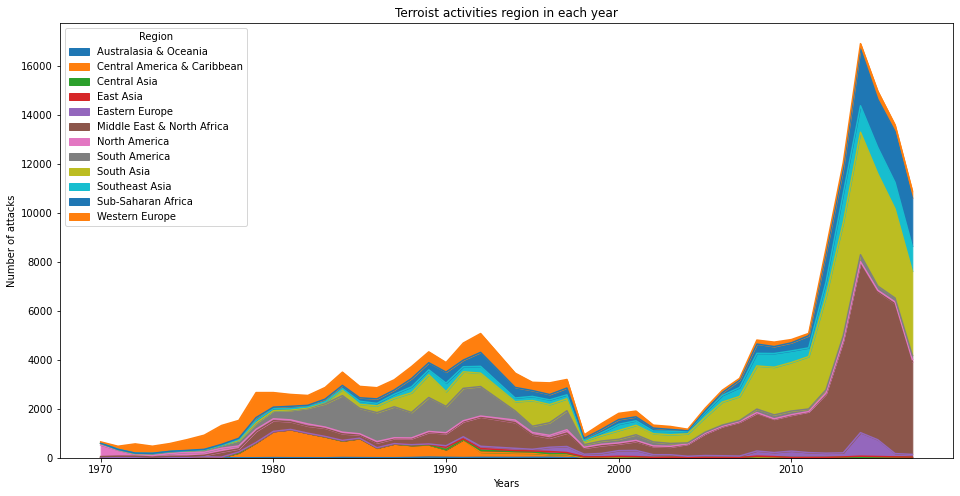

In [109]:
pd.crosstab(data.Year , data.Region).plot(kind = 'area' ,figsize = (16,8))
plt.title('Terroist activities region in each year')
plt.xlabel('Years')
plt.ylabel('Number of attacks')
plt.show()

# Top 10 countries with the most Terroist attacks 

In [122]:
data['Country'].value_counts().head(10)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


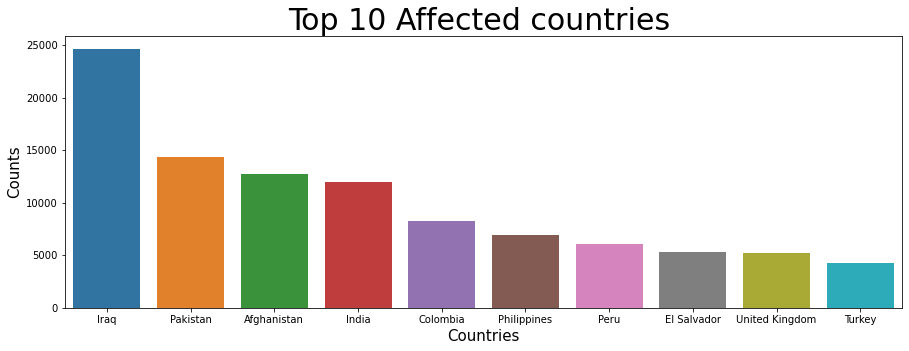

In [155]:
# Showing the top 10 countries in graph
plt.figure(figsize=(15,5))
sns.barplot(data['Country'].value_counts()[:10].index ,data['Country'].value_counts()[:10].values)
plt.title('Top 10 Affected countries ' , fontsize = '30')
plt.xlabel('Countries' , fontsize= '15')
plt.ylabel('Counts', fontsize='15')
plt.show()

# Top 10 states with most Terrorist attacks 

In [147]:
data['State'].value_counts().head(10)

Baghdad               7645
Northern Ireland      4498
Unknown               4290
Balochistan           3710
Saladin               3411
Al Anbar              3299
Nineveh               3241
Sindh                 3206
Khyber Pakhtunkhwa    3084
Diyala                3041
Name: State, dtype: int64

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


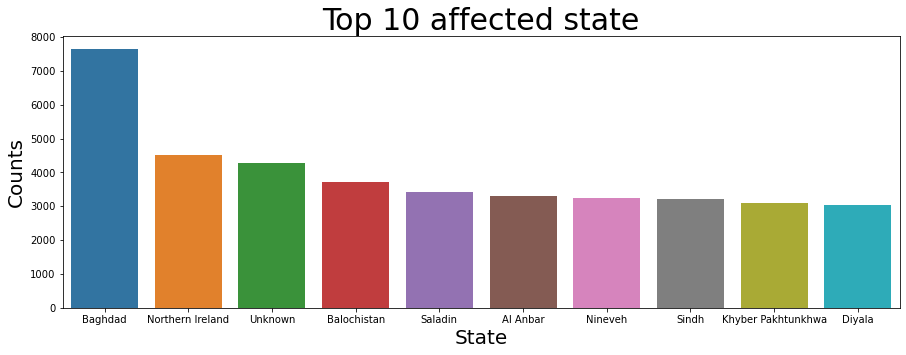

In [154]:
plt.figure(figsize= (15,5))
sns.barplot(data['State'].value_counts()[:10].index , data['State'].value_counts()[:10].values)
plt.title('Top 10 affected state', fontsize = '30')
plt.xlabel('State' , fontsize='20')
plt.ylabel('Counts', fontsize = '20')
plt.show()

# Method of Attacks

In [157]:
data['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


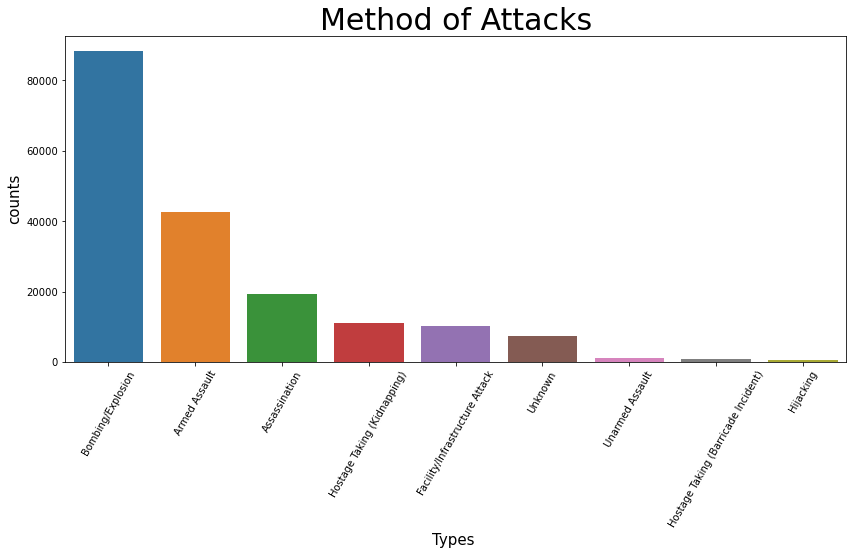

In [174]:
# Showing the attack by the help of graph

plt.figure(figsize=(14,6))
sns.countplot(data['AttackType'] , order = data['AttackType'].value_counts().index )
plt.title('Method of Attacks' , fontsize ='30')
plt.xlabel('Types ' , fontsize ='15')
plt.ylabel('counts' ,fontsize = '15')
plt.xticks(rotation = 60 )
plt.show()

# Number of terrorist activties in each year 

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


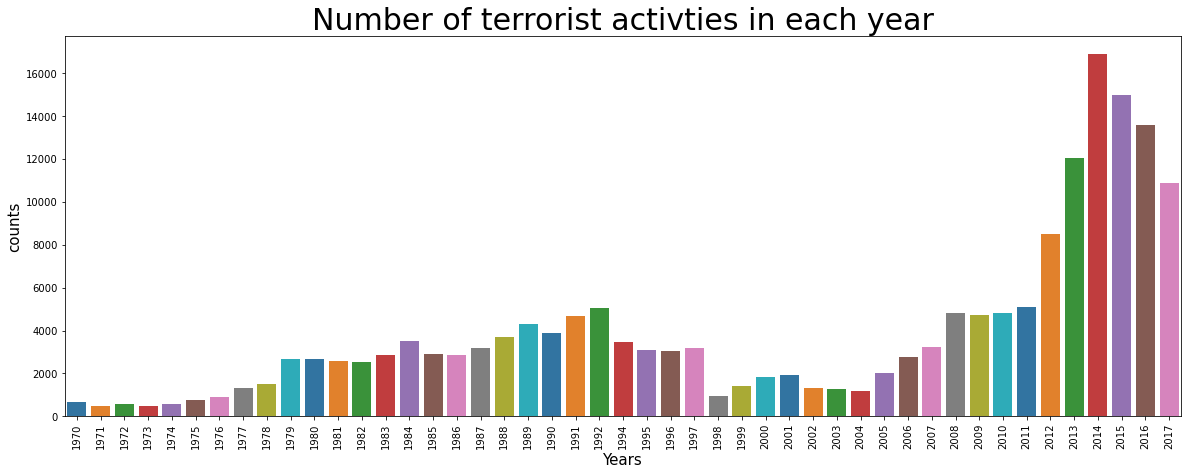

In [193]:
plt.figure(figsize = (20,7))
sns.countplot(data['Year'], palette= 'tab10')
plt.title('Number of terrorist activties in each year', fontsize = 30)
plt.xlabel('Years' , fontsize =15)
plt.ylabel('counts' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Types of Target

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


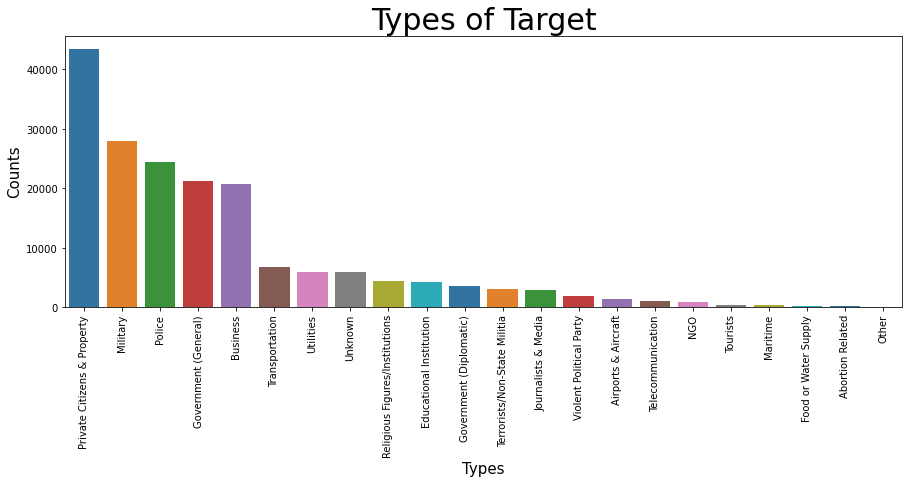

In [202]:
plt.figure(figsize=(15,5))
sns.countplot(data['Target_type'] , order = data['Target_type'].value_counts().index , palette= 'tab10')
plt.title('Types of Target', fontsize = 30)
plt.xlabel('Types' ,fontsize = 15)
plt.ylabel('Counts' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Most Frequent Groups involved in terrorist activity

In [208]:
data['Group'].value_counts().head(10)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

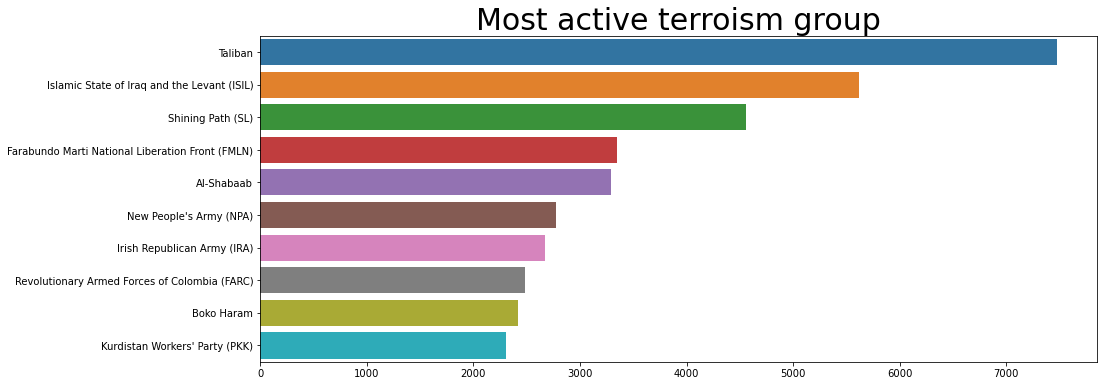

In [228]:
plt.figure(figsize = (15,6))
sns.barplot( y = data['Group'].value_counts()[1:11].index , x = data['Group'].value_counts()[1:11].values)
plt.title('Most active terroism group' , fontsize = 30 )
plt.show()

# Most affected Region

/home/vikasmanjeda/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


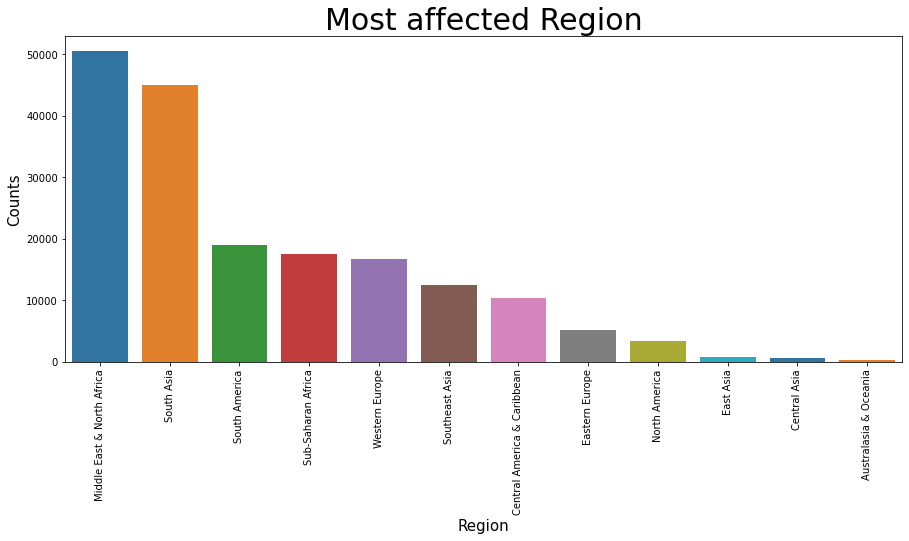

In [239]:
plt.figure(figsize = (15,6))
sns.barplot(data['Region'].value_counts().index , data['Region'].value_counts().values , palette= 'tab10')
plt.title('Most affected Region', fontsize = 30)
plt.xlabel('Region' , fontsize =15)
plt.ylabel('Counts' , fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

# Conclusion

# 1. Most affected country is Iraq.
# 2. Most affected state is Baghdad.
# 3. Most affected region is Middle East and North Africa
# 4. Taliban and ISIL has most active organizations.
# 5. Maximum numbers of attacks are from Bombarding/Explosions
# 6. Most affected years in the past are 2014 and 2015 respectively.
